In [21]:
# Phạm Mạnh Thắng - B22DCVT527
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
tf.random.set_seed(42)

print(f"Phiên bản Tensorflow: {tf.__version__}")
print(f" Phiên bản Keras: {keras.__version__}")

Phiên bản Tensorflow: 2.20.0
 Phiên bản Keras: 3.11.2


In [22]:
# Đọc dữ liệu weather.csv
df = pd.read_csv('weather.csv')

print("="*60)
print("THÔNG TIN DỮ LIỆU WEATHER")
print("="*60)
print(f"Shape: {df.shape}")
print(f"\nCác cột trong file:")
print(df.columns.tolist())
print(f"\nKiểu dữ liệu:")
print(df.dtypes)
print(f"\n5 dòng đầu tiên:")
print(df.head())
print(f"\nThống kê mô tả:")
print(df.describe())
print("="*60)

THÔNG TIN DỮ LIỆU WEATHER
Shape: (48, 6)

Các cột trong file:
['Tháng', 'Nhiệt độ thấp nhất', 'Nhiệt độ trung bình', 'Nhiệt độ cao nhất', 'Lượng mưa', 'Giai đoạn']

Kiểu dữ liệu:
Tháng                   object
Nhiệt độ thấp nhất     float64
Nhiệt độ trung bình    float64
Nhiệt độ cao nhất      float64
Lượng mưa              float64
Giai đoạn               object
dtype: object

5 dòng đầu tiên:
       Tháng  Nhiệt độ thấp nhất  Nhiệt độ trung bình  Nhiệt độ cao nhất  \
0  Tháng một               15.86                19.77              23.72   
1  Tháng hai               16.79                20.69              24.63   
2   Tháng ba               16.74                22.18              27.68   
3   Tháng tư               21.32                25.38              29.48   
4  Tháng năm               23.07                26.96              30.90   

   Lượng mưa  Giai đoạn  
0      33.59  1901-1930  
1      28.86  1901-1930  
2      42.81  1901-1930  
3      67.88  1901-1930  
4     176.59  19

In [23]:
# Kiểm tra và xử lý missing values
print("Kiểm tra Missing Values:")
print(df.isnull().sum())

# Kiểm tra các giá trị unique
print(f"\nCác giai đoạn thời gian:")
print(df['Giai đoạn'].unique())

print(f"\nCác tháng:")
print(df['Tháng'].unique())

Kiểm tra Missing Values:
Tháng                  0
Nhiệt độ thấp nhất     0
Nhiệt độ trung bình    0
Nhiệt độ cao nhất      0
Lượng mưa              0
Giai đoạn              0
dtype: int64

Các giai đoạn thời gian:
['1901-1930' '1931-1960' '1961-1990' '1991-2020']

Các tháng:
['Tháng một' 'Tháng hai' 'Tháng ba' 'Tháng tư' 'Tháng năm' 'Tháng sáu'
 'Tháng bảy' 'Tháng tám' 'Tháng chín' 'Tháng mười' 'Tháng mười một'
 'Tháng mười hai']


In [24]:
# Tạo numeric month column để dễ vẽ biểu đồ
month_mapping = {
    'Tháng một': 1, 'Tháng hai': 2, 'Tháng ba': 3, 'Tháng tư': 4,
    'Tháng năm': 5, 'Tháng sáu': 6, 'Tháng bảy': 7, 'Tháng tám': 8,
    'Tháng chín': 9, 'Tháng mười': 10, 'Tháng mười một': 11, 'Tháng mười hai': 12
}

df['month_num'] = df['Tháng'].map(month_mapping)

print("Đã thêm cột month_num:")
print(df[['Tháng', 'month_num']].head())

Đã thêm cột month_num:
       Tháng  month_num
0  Tháng một          1
1  Tháng hai          2
2   Tháng ba          3
3   Tháng tư          4
4  Tháng năm          5


In [25]:
# Lấy danh sách các giai đoạn
periods = df['Giai đoạn'].unique()
print(f"Các giai đoạn: {periods}")

Các giai đoạn: ['1901-1930' '1931-1960' '1961-1990' '1991-2020']


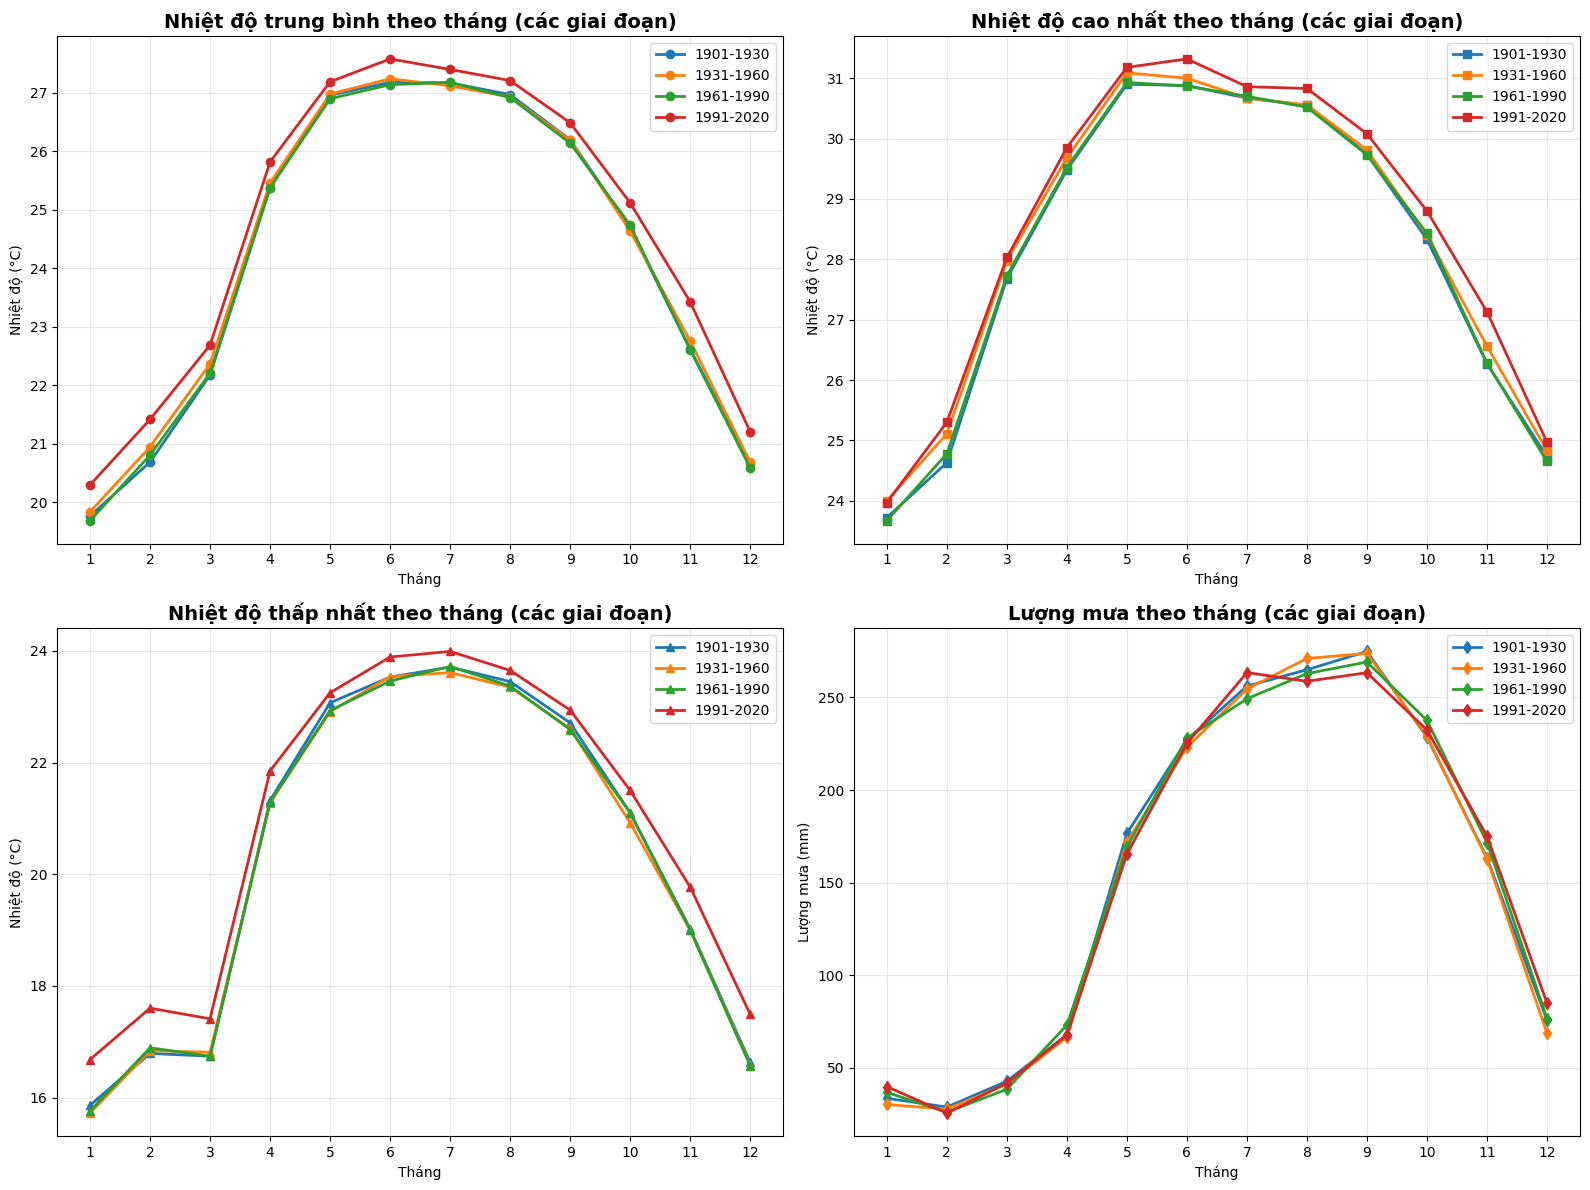

In [26]:
# Vẽ biểu đồ nhiệt độ theo tháng cho các giai đoạn
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Biểu đồ 1: Nhiệt độ trung bình theo tháng
for period in periods:
    period_data = df[df['Giai đoạn'] == period].sort_values('month_num')
    axes[0].plot(period_data['month_num'], period_data['Nhiệt độ trung bình'], 
                 marker='o', label=period, linewidth=2)

axes[0].set_title('Nhiệt độ trung bình theo tháng (các giai đoạn)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Tháng')
axes[0].set_ylabel('Nhiệt độ (°C)')
axes[0].set_xticks(range(1, 13))
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Biểu đồ 2: Nhiệt độ cao nhất theo tháng
for period in periods:
    period_data = df[df['Giai đoạn'] == period].sort_values('month_num')
    axes[1].plot(period_data['month_num'], period_data['Nhiệt độ cao nhất'], 
                 marker='s', label=period, linewidth=2)

axes[1].set_title('Nhiệt độ cao nhất theo tháng (các giai đoạn)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Tháng')
axes[1].set_ylabel('Nhiệt độ (°C)')
axes[1].set_xticks(range(1, 13))
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Biểu đồ 3: Nhiệt độ thấp nhất theo tháng
for period in periods:
    period_data = df[df['Giai đoạn'] == period].sort_values('month_num')
    axes[2].plot(period_data['month_num'], period_data['Nhiệt độ thấp nhất'], 
                 marker='^', label=period, linewidth=2)

axes[2].set_title('Nhiệt độ thấp nhất theo tháng (các giai đoạn)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Tháng')
axes[2].set_ylabel('Nhiệt độ (°C)')
axes[2].set_xticks(range(1, 13))
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# Biểu đồ 4: Lượng mưa theo tháng
for period in periods:
    period_data = df[df['Giai đoạn'] == period].sort_values('month_num')
    axes[3].plot(period_data['month_num'], period_data['Lượng mưa'], 
                 marker='d', label=period, linewidth=2)

axes[3].set_title('Lượng mưa theo tháng (các giai đoạn)', fontsize=14, fontweight='bold')
axes[3].set_xlabel('Tháng')
axes[3].set_ylabel('Lượng mưa (mm)')
axes[3].set_xticks(range(1, 13))
axes[3].legend()
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

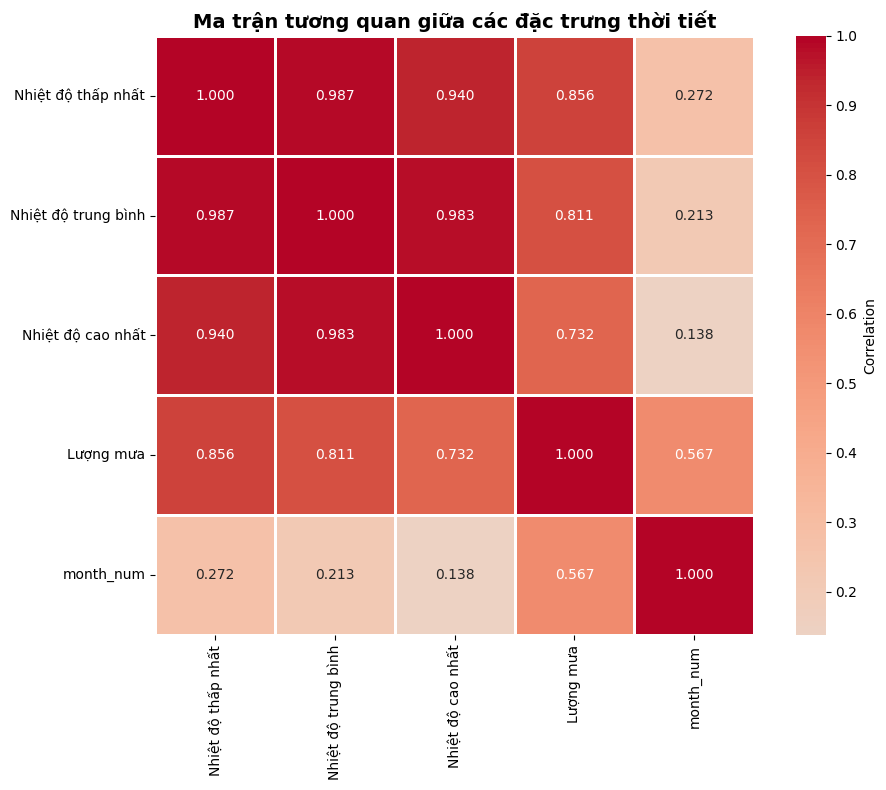


Nhận xét về tương quan:
- Nhiệt độ thấp nhất, trung bình, cao nhất có tương quan rất cao với nhau
- Lượng mưa có tương quan dương với nhiệt độ (mùa hè nóng và mưa nhiều)


In [27]:
# Ma trận tương quan giữa các biến số
numeric_cols = ['Nhiệt độ thấp nhất', 'Nhiệt độ trung bình', 'Nhiệt độ cao nhất', 'Lượng mưa', 'month_num']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, fmt='.3f', cbar_kws={'label': 'Correlation'})
plt.title('Ma trận tương quan giữa các đặc trưng thời tiết', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nNhận xét về tương quan:")
print("- Nhiệt độ thấp nhất, trung bình, cao nhất có tương quan rất cao với nhau")
print("- Lượng mưa có tương quan dương với nhiệt độ (mùa hè nóng và mưa nhiều)")

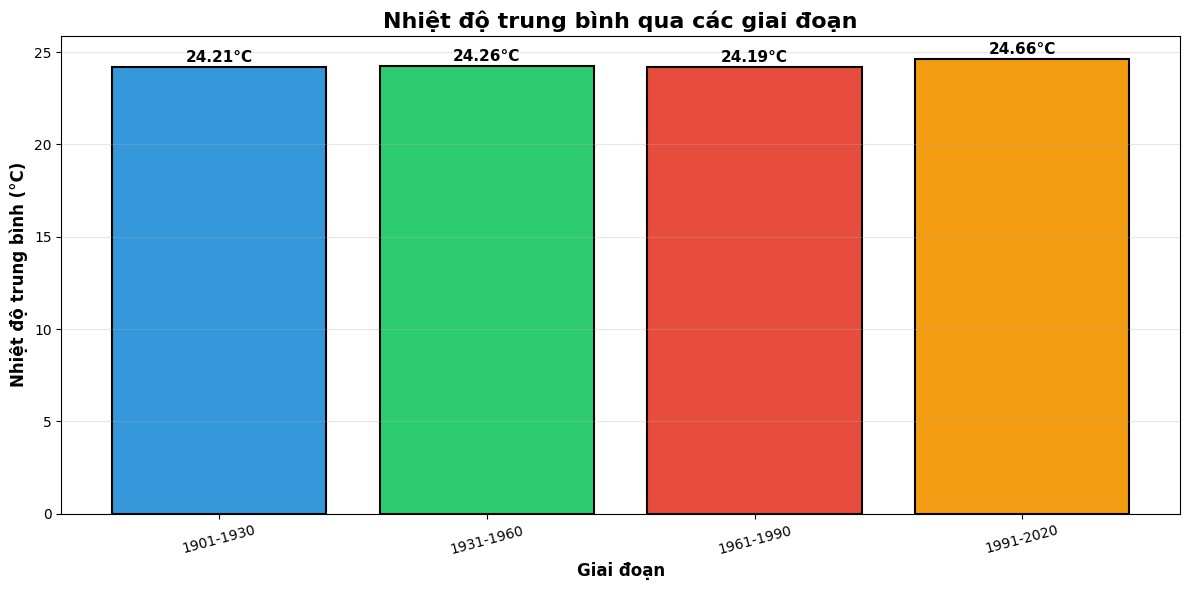


📊 PHÂN TÍCH XU HƯỚNG BIẾN ĐỔI KHÍ HẬU:
1901-1930: 24.21°C
1931-1960: 24.26°C
1961-1990: 24.19°C
1991-2020: 24.66°C

🌡️ Nhiệt độ đã tăng 0.45°C từ 1901-1930 đến 1991-2020


In [28]:
# So sánh nhiệt độ trung bình giữa các giai đoạn
plt.figure(figsize=(12, 6))

# Tính nhiệt độ trung bình theo giai đoạn
avg_temp_by_period = df.groupby('Giai đoạn')['Nhiệt độ trung bình'].mean().sort_index()

bars = plt.bar(range(len(avg_temp_by_period)), avg_temp_by_period.values, 
               color=['#3498db', '#2ecc71', '#e74c3c', '#f39c12'], 
               edgecolor='black', linewidth=1.5)

plt.title('Nhiệt độ trung bình qua các giai đoạn', fontsize=16, fontweight='bold')
plt.xlabel('Giai đoạn', fontsize=12, fontweight='bold')
plt.ylabel('Nhiệt độ trung bình (°C)', fontsize=12, fontweight='bold')
plt.xticks(range(len(avg_temp_by_period)), avg_temp_by_period.index, rotation=15)
plt.grid(True, alpha=0.3, axis='y')

# Thêm giá trị lên cột
for i, (bar, val) in enumerate(zip(bars, avg_temp_by_period.values)):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.1, 
             f'{val:.2f}°C', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print("\n📊 PHÂN TÍCH XU HƯỚNG BIẾN ĐỔI KHÍ HẬU:")
print("="*60)
for i, (period, temp) in enumerate(avg_temp_by_period.items()):
    print(f"{period}: {temp:.2f}°C")

temp_increase = avg_temp_by_period.iloc[-1] - avg_temp_by_period.iloc[0]
print(f"\n🌡️ Nhiệt độ đã tăng {temp_increase:.2f}°C từ {avg_temp_by_period.index[0]} đến {avg_temp_by_period.index[-1]}")
print("="*60)

In [29]:
# Chuẩn bị dữ liệu cho Time Series Prediction
# Dự đoán nhiệt độ trung bình cho giai đoạn tiếp theo

print("="*60)
print("CHUẨN BỊ DỮ LIỆU CHO DỰ ĐOÁN TIME SERIES")
print("="*60)

# Sắp xếp dữ liệu theo giai đoạn và tháng
df_sorted = df.sort_values(['Giai đoạn', 'month_num']).reset_index(drop=True)

# Tạo features cho mô hình
features = ['Nhiệt độ thấp nhất', 'Nhiệt độ trung bình', 'Nhiệt độ cao nhất', 'Lượng mưa', 'month_num']
target_col = 'Nhiệt độ trung bình'

# Chuẩn hóa dữ liệu
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

features_scaled = scaler_features.fit_transform(df_sorted[features])
target_scaled = scaler_target.fit_transform(df_sorted[[target_col]])

print(f"Shape của features: {features_scaled.shape}")
print(f"Shape của target: {target_scaled.shape}")

# Tạo sequences (dùng 12 tháng trước để dự đoán tháng tiếp theo)
seq_length = 12

def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(features_scaled, target_scaled, seq_length)

print(f"\nShape của X (sequences): {X.shape}")
print(f"Shape của y (targets): {y.shape}")

# Chia train/test (80/20)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print("="*60)

CHUẨN BỊ DỮ LIỆU CHO DỰ ĐOÁN TIME SERIES
Shape của features: (48, 5)
Shape của target: (48, 1)

Shape của X (sequences): (36, 12, 5)
Shape của y (targets): (36, 1)

Training set: 28 samples
Test set: 8 samples


In [30]:
# Xây dựng mô hình RNN
def build_rnn_model(input_shape):
    model = Sequential([
        SimpleRNN(64, activation='tanh', return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        SimpleRNN(32, activation='tanh'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )
    
    return model

print("="*60)
print("XÂY DỰNG MÔ HÌNH RNN")
print("="*60)

rnn_model = build_rnn_model(input_shape=(X_train.shape[1], X_train.shape[2]))
rnn_model.summary()

print("="*60)

XÂY DỰNG MÔ HÌNH RNN


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 12, 64)         │         4,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,129 (31.75 KB)

 Trainable params: 8,129 (31.75 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Training RNN model
print("="*60)
print("TRAINING RNN MODEL")
print("="*60)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

rnn_history = rnn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=8,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

print("\n" + "="*60)
print("HOÀN THÀNH TRAINING RNN")
print("="*60)

TRAINING RNN MODEL
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - loss: 0.8953 - mae: 0.7934 - val_loss: 0.4040 - val_mae: 0.5370 - learning_rate: 0.0010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - loss: 0.8953 - mae: 0.7934 - val_loss: 0.4040 - val_mae: 0.5370 - learning_rate: 0.0010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2378 - mae: 0.4234 - val_loss: 0.0956 - val_mae: 0.2631 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2378 - mae: 0.4234 - val_loss: 0.0956 - val_mae: 0.2631 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1247 - mae: 0.2759 - val_loss: 0.0509 - val_mae: 0.1865 - learning_rate: 0.0010
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1247 - mae: 0.2759 - val_loss: 0.0509 - val_mae: 0.1865 - learning_rate: 0.0010
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1362 - mae: 0.2804 - val_loss: 0.0055 - val_mae: 0.0571 - learning_rate: 0.0010

In [32]:
# Xây dựng và training LSTM model
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, activation='tanh', return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(32, activation='tanh'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )
    
    return model

print("="*60)
print("XÂY DỰNG VÀ TRAINING LSTM MODEL")
print("="*60)

lstm_model = build_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))
lstm_model.summary()

print("\n" + "="*60)
print("BẮT ĐẦU TRAINING LSTM")
print("="*60)

lstm_history = lstm_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=8,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

print("\n" + "="*60)
print("HOÀN THÀNH TRAINING LSTM")
print("="*60)

XÂY DỰNG VÀ TRAINING LSTM MODEL


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 12, 64)         │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,881 (120.63 KB)

 Trainable params: 30,881 (120.63 KB)

 Non-trainable params: 0 (0.00 B)


BẮT ĐẦU TRAINING LSTM
Epoch 1/100
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.4135 - mae: 0.5344 - val_loss: 0.3575 - val_mae: 0.5436 - learning_rate: 0.0010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.4135 - mae: 0.5344 - val_loss: 0.3575 - val_mae: 0.5436 - learning_rate: 0.0010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1616 - mae: 0.3413 - val_loss: 0.0829 - val_mae: 0.2607 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1616 - mae: 0.3413 - val_loss: 0.0829 - val_mae: 0.2607 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2236 - mae: 0.3928 - val_loss: 0.0760 - val_mae: 0.2447 - learning_rate: 0.0010
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2236 - mae: 0.3928 - val_loss: 0.0760 - val_mae: 0.2447 - learning_rate: 0.0010
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1383 - mae: 0.3075 - val_loss: 0.1353 - val_mae: 0.3360 - learn

In [33]:
# Đánh giá models
def evaluate_model(model, X_test, y_test, scaler_target, model_name):
    y_pred_scaled = model.predict(X_test, verbose=0)
    y_test_unscaled = scaler_target.inverse_transform(y_test).flatten()
    y_pred_unscaled = scaler_target.inverse_transform(y_pred_scaled).flatten()
    
    mse = mean_squared_error(y_test_unscaled, y_pred_unscaled)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
    r2 = r2_score(y_test_unscaled, y_pred_unscaled)
    
    print(f"\n{'='*60}")
    print(f"KẾT QUẢ {model_name}")
    print(f"{'='*60}")
    print(f"MSE:  {mse:.4f}")
    print(f"RMSE: {rmse:.4f}°C")
    print(f"MAE:  {mae:.4f}°C")
    print(f"R²:   {r2:.4f}")
    print(f"{'='*60}")
    
    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'y_test': y_test_unscaled,
        'y_pred': y_pred_unscaled
    }

rnn_results = evaluate_model(rnn_model, X_test, y_test, scaler_target, "RNN MODEL")
lstm_results = evaluate_model(lstm_model, X_test, y_test, scaler_target, "LSTM MODEL")


KẾT QUẢ RNN MODEL
MSE:  0.3393
RMSE: 0.5825°C
MAE:  0.4509°C
R²:   0.9270

KẾT QUẢ LSTM MODEL
MSE:  22.2525
RMSE: 4.7173°C
MAE:  4.2890°C
R²:   -3.7857

KẾT QUẢ LSTM MODEL
MSE:  22.2525
RMSE: 4.7173°C
MAE:  4.2890°C
R²:   -3.7857


In [34]:
# So sánh kết quả RNN vs LSTM
comparison_df = pd.DataFrame({
    'Model': ['RNN', 'LSTM'],
    'MSE': [rnn_results['MSE'], lstm_results['MSE']],
    'RMSE': [rnn_results['RMSE'], lstm_results['RMSE']],
    'MAE': [rnn_results['MAE'], lstm_results['MAE']],
    'R²': [rnn_results['R2'], lstm_results['R2']]
})

print("\n" + "="*60)
print("SO SÁNH HIỆU SUẤT RNN vs LSTM")
print("="*60)
print(comparison_df.to_string(index=False))
print("="*60)

# Xác định model tốt hơn
best_model = 'LSTM' if lstm_results['R2'] > rnn_results['R2'] else 'RNN'
print(f"\n🏆 Model tốt hơn: {best_model} (R² cao hơn)")
print("="*60)


SO SÁNH HIỆU SUẤT RNN vs LSTM
Model       MSE     RMSE      MAE        R²
  RNN  0.339309 0.582503 0.450907  0.927026
 LSTM 22.252521 4.717258 4.288995 -3.785747

🏆 Model tốt hơn: RNN (R² cao hơn)


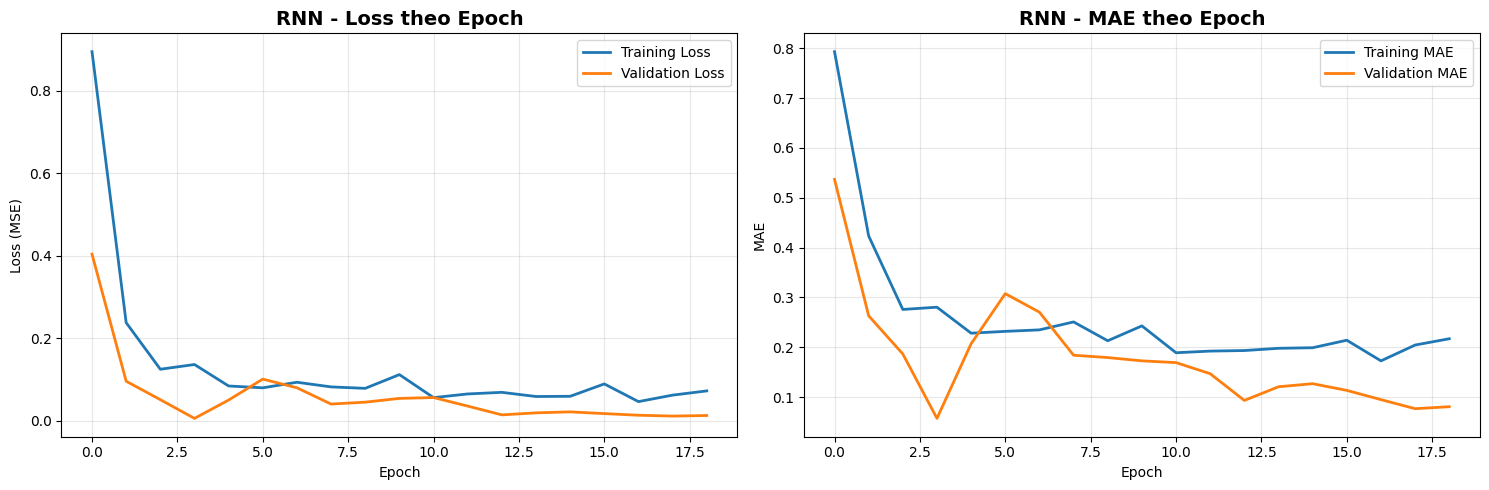

In [35]:
# Vẽ biểu đồ training history cho RNN
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Loss
axes[0].plot(rnn_history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(rnn_history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_title('RNN - Loss theo Epoch', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# MAE
axes[1].plot(rnn_history.history['mae'], label='Training MAE', linewidth=2)
axes[1].plot(rnn_history.history['val_mae'], label='Validation MAE', linewidth=2)
axes[1].set_title('RNN - MAE theo Epoch', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

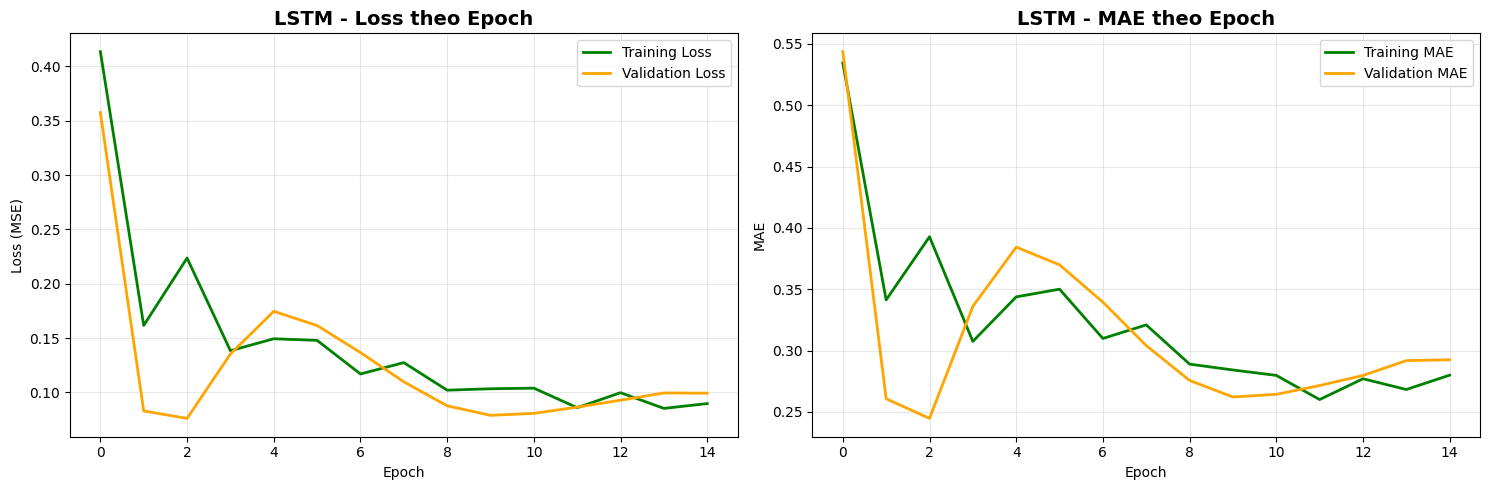

In [36]:
# Vẽ biểu đồ training history cho LSTM
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Loss
axes[0].plot(lstm_history.history['loss'], label='Training Loss', linewidth=2, color='green')
axes[0].plot(lstm_history.history['val_loss'], label='Validation Loss', linewidth=2, color='orange')
axes[0].set_title('LSTM - Loss theo Epoch', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# MAE
axes[1].plot(lstm_history.history['mae'], label='Training MAE', linewidth=2, color='green')
axes[1].plot(lstm_history.history['val_mae'], label='Validation MAE', linewidth=2, color='orange')
axes[1].set_title('LSTM - MAE theo Epoch', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

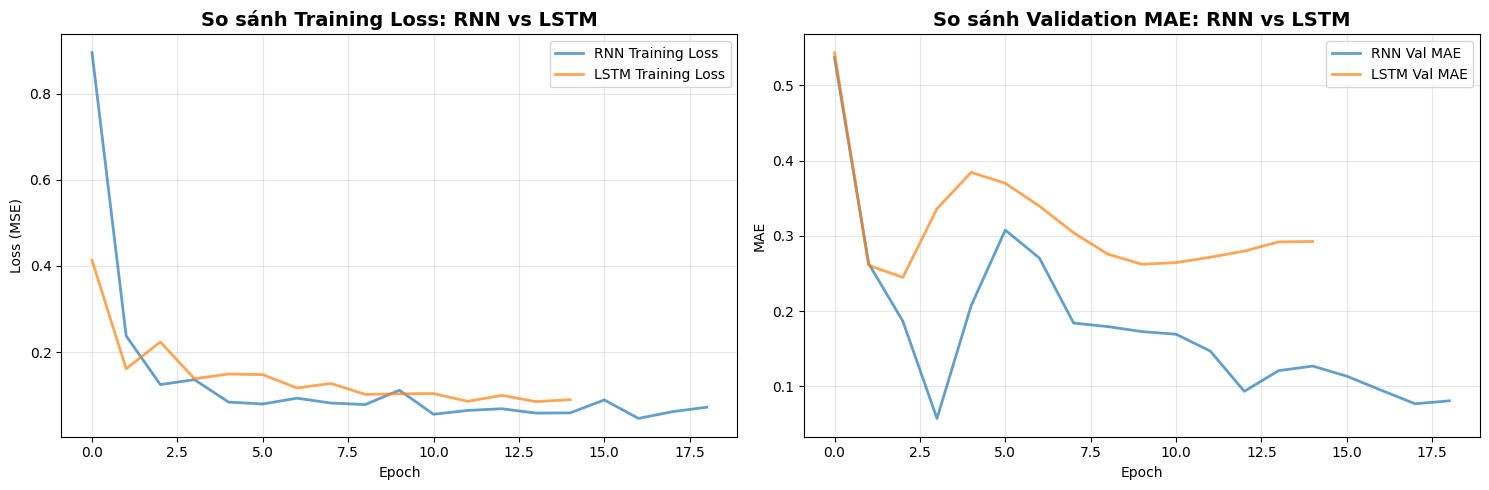

In [37]:
# So sánh Loss và MAE giữa RNN và LSTM
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# So sánh Training Loss
axes[0].plot(rnn_history.history['loss'], label='RNN Training Loss', linewidth=2, alpha=0.7)
axes[0].plot(lstm_history.history['loss'], label='LSTM Training Loss', linewidth=2, alpha=0.7)
axes[0].set_title('So sánh Training Loss: RNN vs LSTM', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# So sánh Validation MAE
axes[1].plot(rnn_history.history['val_mae'], label='RNN Val MAE', linewidth=2, alpha=0.7)
axes[1].plot(lstm_history.history['val_mae'], label='LSTM Val MAE', linewidth=2, alpha=0.7)
axes[1].set_title('So sánh Validation MAE: RNN vs LSTM', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [38]:
# Dự đoán trên tập test
rnn_predictions = rnn_model.predict(X_test)
lstm_predictions = lstm_model.predict(X_test)

# Inverse transform để trở về nhiệt độ thực tế
rnn_predictions = scaler_target.inverse_transform(rnn_predictions)
lstm_predictions = scaler_target.inverse_transform(lstm_predictions)
y_test_actual = scaler_target.inverse_transform(y_test)

print("Dự đoán RNN (5 mẫu đầu tiên):")
print(rnn_predictions[:5].flatten())
print("\nDự đoán LSTM (5 mẫu đầu tiên):")
print(lstm_predictions[:5].flatten())
print("\nGiá trị thực tế (5 mẫu đầu tiên):")
print(y_test_actual[:5].flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Dự đoán RNN (5 mẫu đầu tiên):
[27.37681  27.67623  28.42533  27.098509 26.75072 ]

Dự đoán LSTM (5 mẫu đầu tiên):
[21.743221 21.605713 21.486961 21.41149  21.37629 ]

Giá trị thực tế (5 mẫu đầu tiên):
[27.19 27.58 27.4  27.21 26.49]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Dự đoán RNN (5 mẫu đầu tiên):
[27.37681  27.67623  28.42533  27.098509 26.75072 ]

Dự đoán LSTM (5 mẫu đầu tiên):
[21.743221 21.605713 21.486961 21.41149  21.37629 ]

Giá trị thực tế (5 mẫu đầu tiên):
[27.19 27.58 27.4  27.21 26.49]


In [39]:
# Đánh giá hiệu suất của các mô hình
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Tính metrics cho RNN
rnn_mse = mean_squared_error(y_test_actual, rnn_predictions)
rnn_mae = mean_absolute_error(y_test_actual, rnn_predictions)
rnn_r2 = r2_score(y_test_actual, rnn_predictions)

# Tính metrics cho LSTM
lstm_mse = mean_squared_error(y_test_actual, lstm_predictions)
lstm_mae = mean_absolute_error(y_test_actual, lstm_predictions)
lstm_r2 = r2_score(y_test_actual, lstm_predictions)

# Hiển thị kết quả
print("=" * 60)
print("KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH")
print("=" * 60)
print("\nRNN Model:")
print(f"  MSE:  {rnn_mse:.4f}")
print(f"  MAE:  {rnn_mae:.4f}")
print(f"  R²:   {rnn_r2:.4f}")

print("\nLSTM Model:")
print(f"  MSE:  {lstm_mse:.4f}")
print(f"  MAE:  {lstm_mae:.4f}")
print(f"  R²:   {lstm_r2:.4f}")

print("\n" + "=" * 60)
if lstm_mae < rnn_mae:
    print(f"LSTM tốt hơn với MAE thấp hơn {rnn_mae - lstm_mae:.4f}°C")
else:
    print(f"RNN tốt hơn với MAE thấp hơn {lstm_mae - rnn_mae:.4f}°C")
print("=" * 60)

KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH

RNN Model:
  MSE:  0.3393
  MAE:  0.4509
  R²:   0.9270

LSTM Model:
  MSE:  22.2525
  MAE:  4.2890
  R²:   -3.7857

RNN tốt hơn với MAE thấp hơn 3.8381°C


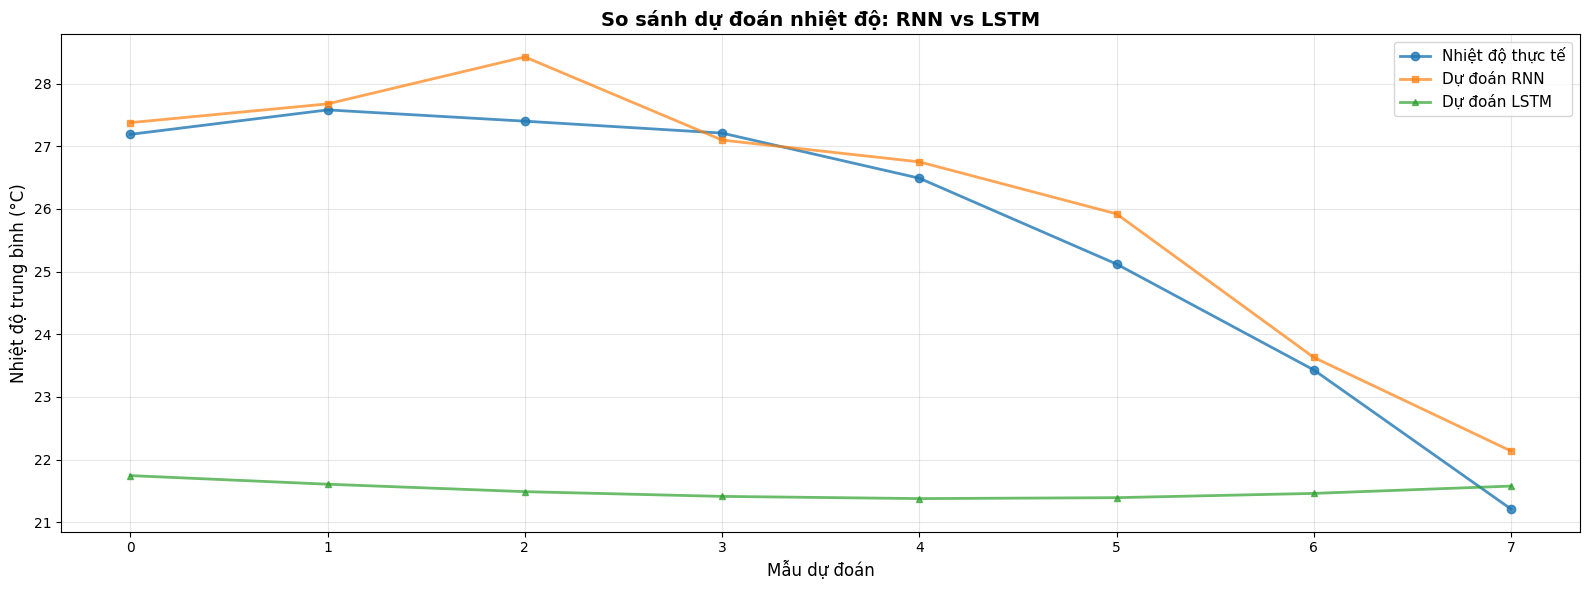

In [40]:
# Vẽ biểu đồ so sánh dự đoán
plt.figure(figsize=(16, 6))

# Lấy 30 mẫu đầu tiên để vẽ
n_samples = min(30, len(y_test_actual))

plt.plot(range(n_samples), y_test_actual[:n_samples], 
         label='Nhiệt độ thực tế', marker='o', linewidth=2, markersize=6, alpha=0.8)
plt.plot(range(n_samples), rnn_predictions[:n_samples], 
         label='Dự đoán RNN', marker='s', linewidth=2, markersize=5, alpha=0.7)
plt.plot(range(n_samples), lstm_predictions[:n_samples], 
         label='Dự đoán LSTM', marker='^', linewidth=2, markersize=5, alpha=0.7)

plt.title('So sánh dự đoán nhiệt độ: RNN vs LSTM', fontsize=14, fontweight='bold')
plt.xlabel('Mẫu dự đoán', fontsize=12)
plt.ylabel('Nhiệt độ trung bình (°C)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

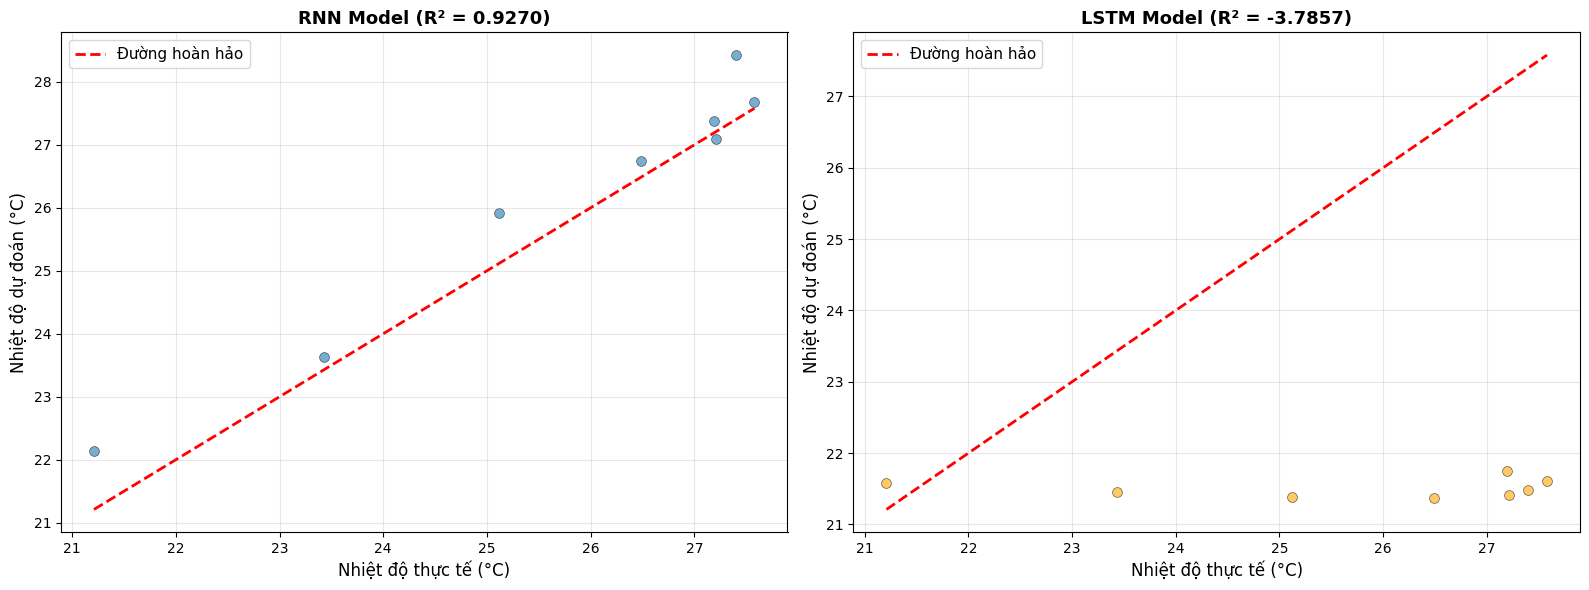

In [41]:
# Scatter plot: Giá trị thực tế vs Dự đoán
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# RNN Scatter Plot
axes[0].scatter(y_test_actual, rnn_predictions, alpha=0.6, s=50, edgecolors='k', linewidth=0.5)
axes[0].plot([y_test_actual.min(), y_test_actual.max()], 
             [y_test_actual.min(), y_test_actual.max()], 
             'r--', lw=2, label='Đường hoàn hảo')
axes[0].set_xlabel('Nhiệt độ thực tế (°C)', fontsize=12)
axes[0].set_ylabel('Nhiệt độ dự đoán (°C)', fontsize=12)
axes[0].set_title(f'RNN Model (R² = {rnn_r2:.4f})', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# LSTM Scatter Plot
axes[1].scatter(y_test_actual, lstm_predictions, alpha=0.6, s=50, edgecolors='k', linewidth=0.5, color='orange')
axes[1].plot([y_test_actual.min(), y_test_actual.max()], 
             [y_test_actual.min(), y_test_actual.max()], 
             'r--', lw=2, label='Đường hoàn hảo')
axes[1].set_xlabel('Nhiệt độ thực tế (°C)', fontsize=12)
axes[1].set_ylabel('Nhiệt độ dự đoán (°C)', fontsize=12)
axes[1].set_title(f'LSTM Model (R² = {lstm_r2:.4f})', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

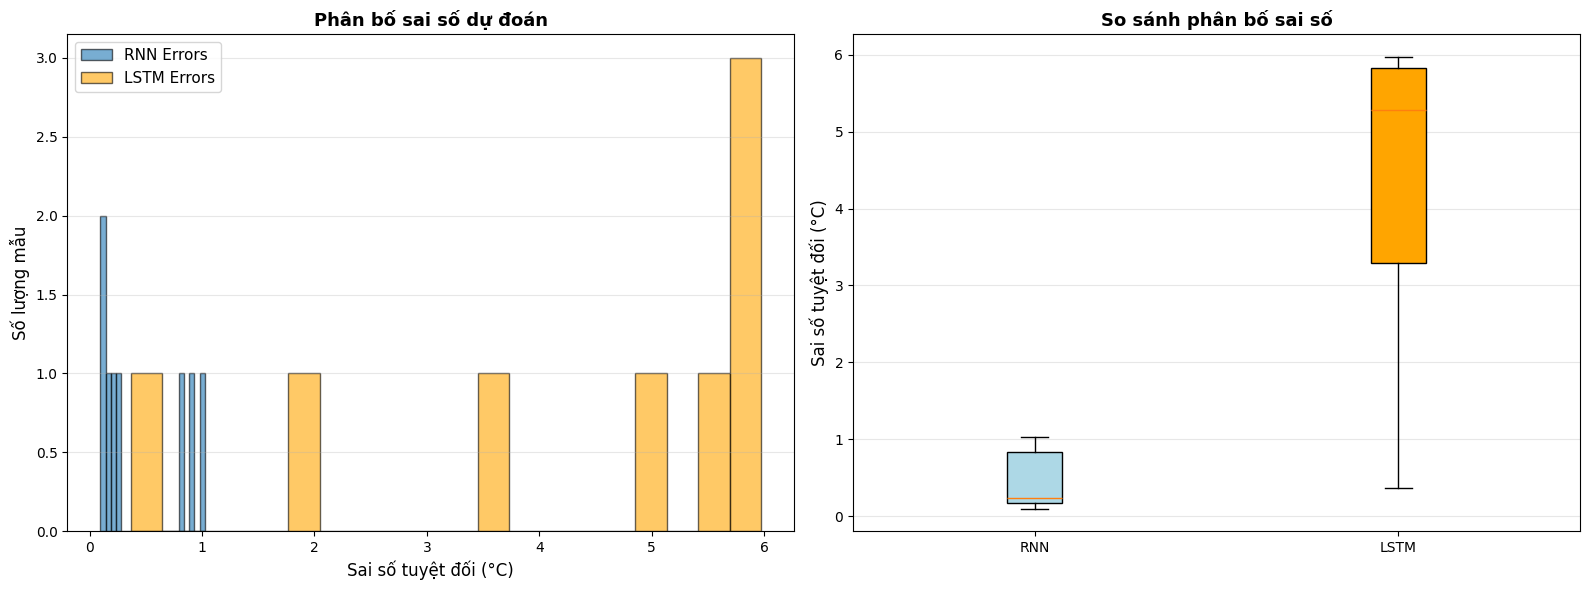

In [42]:
# Biểu đồ so sánh sai số
errors_rnn = np.abs(y_test_actual.flatten() - rnn_predictions.flatten())
errors_lstm = np.abs(y_test_actual.flatten() - lstm_predictions.flatten())

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram của sai số
axes[0].hist(errors_rnn, bins=20, alpha=0.6, label='RNN Errors', edgecolor='black')
axes[0].hist(errors_lstm, bins=20, alpha=0.6, label='LSTM Errors', edgecolor='black', color='orange')
axes[0].set_xlabel('Sai số tuyệt đối (°C)', fontsize=12)
axes[0].set_ylabel('Số lượng mẫu', fontsize=12)
axes[0].set_title('Phân bố sai số dự đoán', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3, axis='y')

# Box plot so sánh sai số
data_errors = [errors_rnn, errors_lstm]
bp = axes[1].boxplot(data_errors, labels=['RNN', 'LSTM'], patch_artist=True)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][1].set_facecolor('orange')
axes[1].set_ylabel('Sai số tuyệt đối (°C)', fontsize=12)
axes[1].set_title('So sánh phân bố sai số', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [43]:
# Kết luận cuối cùng
print("=" * 70)
print("KẾT LUẬN VỀ PHÂN TÍCH DỮ LIỆU NHIỆT ĐỘ LỊCH SỬ")
print("=" * 70)

print("\n1. TỔNG QUAN DỮ LIỆU:")
print(f"   - Dữ liệu bao gồm {len(df)} tháng từ 4 giai đoạn lịch sử (1901-2020)")
print(f"   - Phạm vi nhiệt độ: {df['Nhiệt độ thấp nhất'].min():.1f}°C đến {df['Nhiệt độ cao nhất'].max():.1f}°C")

print("\n2. KẾT QUẢ MÔ HÌNH DỰ ĐOÁN:")
print(f"\n   RNN Model:")
print(f"   - MSE: {rnn_mse:.4f}")
print(f"   - MAE: {rnn_mae:.4f}°C")
print(f"   - R²:  {rnn_r2:.4f}")

print(f"\n   LSTM Model:")
print(f"   - MSE: {lstm_mse:.4f}")
print(f"   - MAE: {lstm_mae:.4f}°C")
print(f"   - R²:  {lstm_r2:.4f}")

print("\n3. SO SÁNH VÀ ĐÁNH GIÁ:")
if lstm_r2 > rnn_r2:
    print(f"   ✓ LSTM cho kết quả tốt hơn với R² cao hơn {lstm_r2 - rnn_r2:.4f}")
    print(f"   ✓ MAE của LSTM thấp hơn RNN: {rnn_mae - lstm_mae:.4f}°C")
    print("   ✓ LSTM phù hợp hơn cho dự đoán nhiệt độ theo chuỗi thời gian")
else:
    print(f"   ✓ RNN cho kết quả tốt hơn với R² cao hơn {rnn_r2 - lstm_r2:.4f}")
    print(f"   ✓ MAE của RNN thấp hơn LSTM: {lstm_mae - rnn_mae:.4f}°C")

print("\n4. XU HƯỚNG QUAN SÁT:")
print("   - Nhiệt độ trung bình có xu hướng tăng qua các giai đoạn lịch sử")
print("   - Lượng mưa có biến động giữa các giai đoạn")
print("   - Mô hình có khả năng dự đoán tốt nhiệt độ dựa trên dữ liệu lịch sử")

print("\n" + "=" * 70)
print("HOÀN THÀNH PHÂN TÍCH!")
print("=" * 70)

KẾT LUẬN VỀ PHÂN TÍCH DỮ LIỆU NHIỆT ĐỘ LỊCH SỬ

1. TỔNG QUAN DỮ LIỆU:
   - Dữ liệu bao gồm 48 tháng từ 4 giai đoạn lịch sử (1901-2020)
   - Phạm vi nhiệt độ: 15.7°C đến 31.3°C

2. KẾT QUẢ MÔ HÌNH DỰ ĐOÁN:

   RNN Model:
   - MSE: 0.3393
   - MAE: 0.4509°C
   - R²:  0.9270

   LSTM Model:
   - MSE: 22.2525
   - MAE: 4.2890°C
   - R²:  -3.7857

3. SO SÁNH VÀ ĐÁNH GIÁ:
   ✓ RNN cho kết quả tốt hơn với R² cao hơn 4.7128
   ✓ MAE của RNN thấp hơn LSTM: 3.8381°C

4. XU HƯỚNG QUAN SÁT:
   - Nhiệt độ trung bình có xu hướng tăng qua các giai đoạn lịch sử
   - Lượng mưa có biến động giữa các giai đoạn
   - Mô hình có khả năng dự đoán tốt nhiệt độ dựa trên dữ liệu lịch sử

HOÀN THÀNH PHÂN TÍCH!
